In [6]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
# Load data
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)


In [37]:
# Data exploration
print(df.head())
print(df.describe())
print(df.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

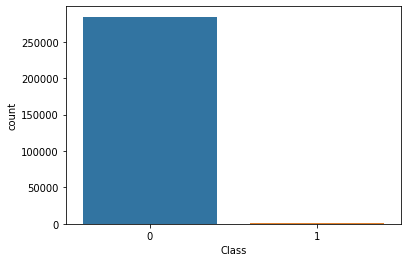

In [38]:
# Visualize target variable distribution
sns.countplot(x='Class', data=df)
plt.show()


In [39]:
# Check for missing values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


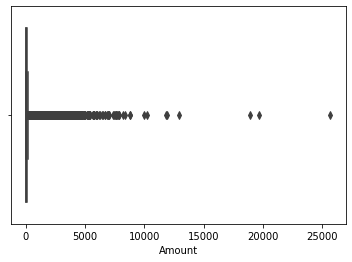

In [40]:
# Check for outliers
sns.boxplot(x='Amount', data=df)
plt.show()


In [41]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [42]:
# Standardize numerical features
num_features = ['Time', 'Amount']
num_transformer = StandardScaler()
ct = ColumnTransformer([('num', num_transformer, num_features)], remainder='passthrough')
df[num_features] = ct.fit_transform(df[num_features])

# One-hot encode categorical features
cat_features = ['Class']
cat_transformer = OneHotEncoder()
ct = ColumnTransformer([('cat', cat_transformer, cat_features)], remainder='passthrough')
df = ct.fit_transform(df)


In [43]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[:, :-1], df[:, -1], test_size=0.2, random_state=42)


In [44]:
# Reinforcement learning model
from collections import defaultdict


In [45]:
# Define states
def create_state(observation):
    state = []
    for i in range(len(observation)):
        state.append(round(observation[i], 2))
    return tuple(state)

# Define actions
actions = ['do_not_block', 'block']

# Define rewards
def calculate_reward(observation, action):
    # print(action, observation[-1])
    if action == 'do_not_block' and observation[0] == 0:
        return 1
    elif action == 'do_not_block' and observation[0] == 1:
        return -1
    elif action == 'block' and observation[0] == 0:
        return -5
    elif action == 'block' and observation[0] == 1:
        return 5



In [46]:
# Implement Q-learning algorithm
q_table = defaultdict(lambda: [0, 0])
alpha = 0.1
gamma = 1.0
epsilon = 0.1
num_episodes = 1000

for i in range(num_episodes):
    state = create_state(X_train[i])
    if np.random.uniform() < epsilon:
        action = np.random.choice(actions)
    else:
        if q_table[state][0] > q_table[state][1]:
            action = actions[0]
        else:
            action = actions[1]
    reward = calculate_reward(X_train[i], action)
    next_state = create_state(X_train[i+1])
    # print(reward)
    q_table[state][actions.index(action)] += alpha * (reward + gamma * max(q_table[next_state]) - q_table[state][actions.index(action)])
print(q_table)



defaultdict(<function <lambda> at 0x7fae4420ab80>, {(1.0, 0.0, 1.02, 1.96, -0.38, -0.32, 0.33, -0.51, -0.09, -0.63, 0.04, 1.05, -0.03, 0.62, 1.69, 1.26, -0.25, -0.33, 0.31, -0.93, 0.65, 0.17, -0.13, 0.24, 0.97, 0.05, -0.28, -0.04, -0.22, 0.05, -0.05): [0, 0.5], (1.0, 0.0, 0.47, -0.4, -0.63, 1.56, -2.02, -0.11, 0.17, 0.02, -0.4, 0.04, 0.61, -1.95, -0.73, 1.06, -1.19, 0.63, -0.16, -1.63, 2.11, -1.69, -0.47, -0.15, 0.42, 0.11, -1.0, -1.18, 0.36, -0.37, -0.14): [0, 0.5], (1.0, 0.0, 1.15, 0.07, 0.82, -0.56, -0.71, 1.08, -0.36, 0.79, 0.12, -0.13, -0.64, 0.52, -0.07, -1.01, -0.64, -0.8, 0.68, 0.04, 0.52, 0.2, 0.01, -0.31, -0.87, 0.08, 0.15, -0.43, 0.12, 0.21, 0.07): [-0.1, 0], (1.0, 0.0, -0.02, -0.54, 1.01, 1.75, 2.77, 0.5, 1.0, 0.85, -0.08, 0.37, 0.56, -0.86, -4.18, 0.29, 1.27, -1.01, 1.46, -0.61, 0.81, -2.15, -0.25, 0.06, 0.44, -0.07, 0.45, -0.66, -0.18, -0.09, -0.06): [-0.1, 0], (1.0, 0.0, -0.26, -4.03, 1.9, -0.43, -0.03, -0.86, -0.48, -0.44, 1.31, 0.54, 1.22, 0.47, 1.6, 0.78, 0.19, -1.06,

In [51]:
# Test model
tp, fp, tn, fn = 0, 0, 0, 0

for i in range(len(X_test)):
    state = create_state(X_test[i])
    #print(q_table[state])
    if q_table[state][0] > q_table[state][1]:
        action = actions[0]
    else:
        action = actions[1]
    # print(y_test[i])
    if action == 'block' and y_test[i] < 0:
        tp += 1
    elif action == 'block' and y_test[i] >= 0:
        fp += 1
    elif action == 'do_not_block' and y_test[i] == 0:
        tn += 1
    elif action == 'do_not_block' and y_test[i] == 1:
        fn += 1

accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7734981215547206
Precision: 0.7734981215547206
Recall: 1.0
F1 Score: 0.8722852447981628
